# Imports

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

from sklearn.metrics.pairwise import pairwise_distances_argmin

np.random.seed(0)

In [2]:
%matplotlib inline


# Comparison of the K-Means and MiniBatchKMeans clustering algorithms

We want to compare the performance of the MiniBatchKMeans and KMeans:
the MiniBatchKMeans is faster, but gives slightly different results (see
`mini_batch_kmeans`).

We will cluster a set of data, first with KMeans and then with
MiniBatchKMeans, and plot the results.
We will also plot the points that are labelled differently between the two
algorithms.


## Generate the data

We start by generating the circles of data to be clustered.



In [3]:
X, labels_true = make_circles(n_samples=3000, noise=0.05, factor=0.6)

## Compute clustering with KMeans



In [4]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

## Compute clustering with MiniBatchKMeans



In [5]:
sc = SpectralClustering(
    n_clusters=2,
    eigen_solver="arpack",
    affinity="nearest_neighbors",
)
t0 = time.time()
sc.fit(X)
t_mini_batch = time.time() - t0

## Establishing parity between clusters

We want to have the same color for the same cluster from both the
SpectralClustering and the KMeans algorithm. Let's pair the cluster centers per
closest one.



In [6]:
k_means_labels = k_means.labels_.astype(np.int)
sc_labels = sc.labels_.astype(np.int)

<ipython-input-6-1da80a5957b1>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k_means_labels = k_means.labels_.astype(np.int)
<ipython-input-6-1da80a5957b1>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 

## Plotting the results



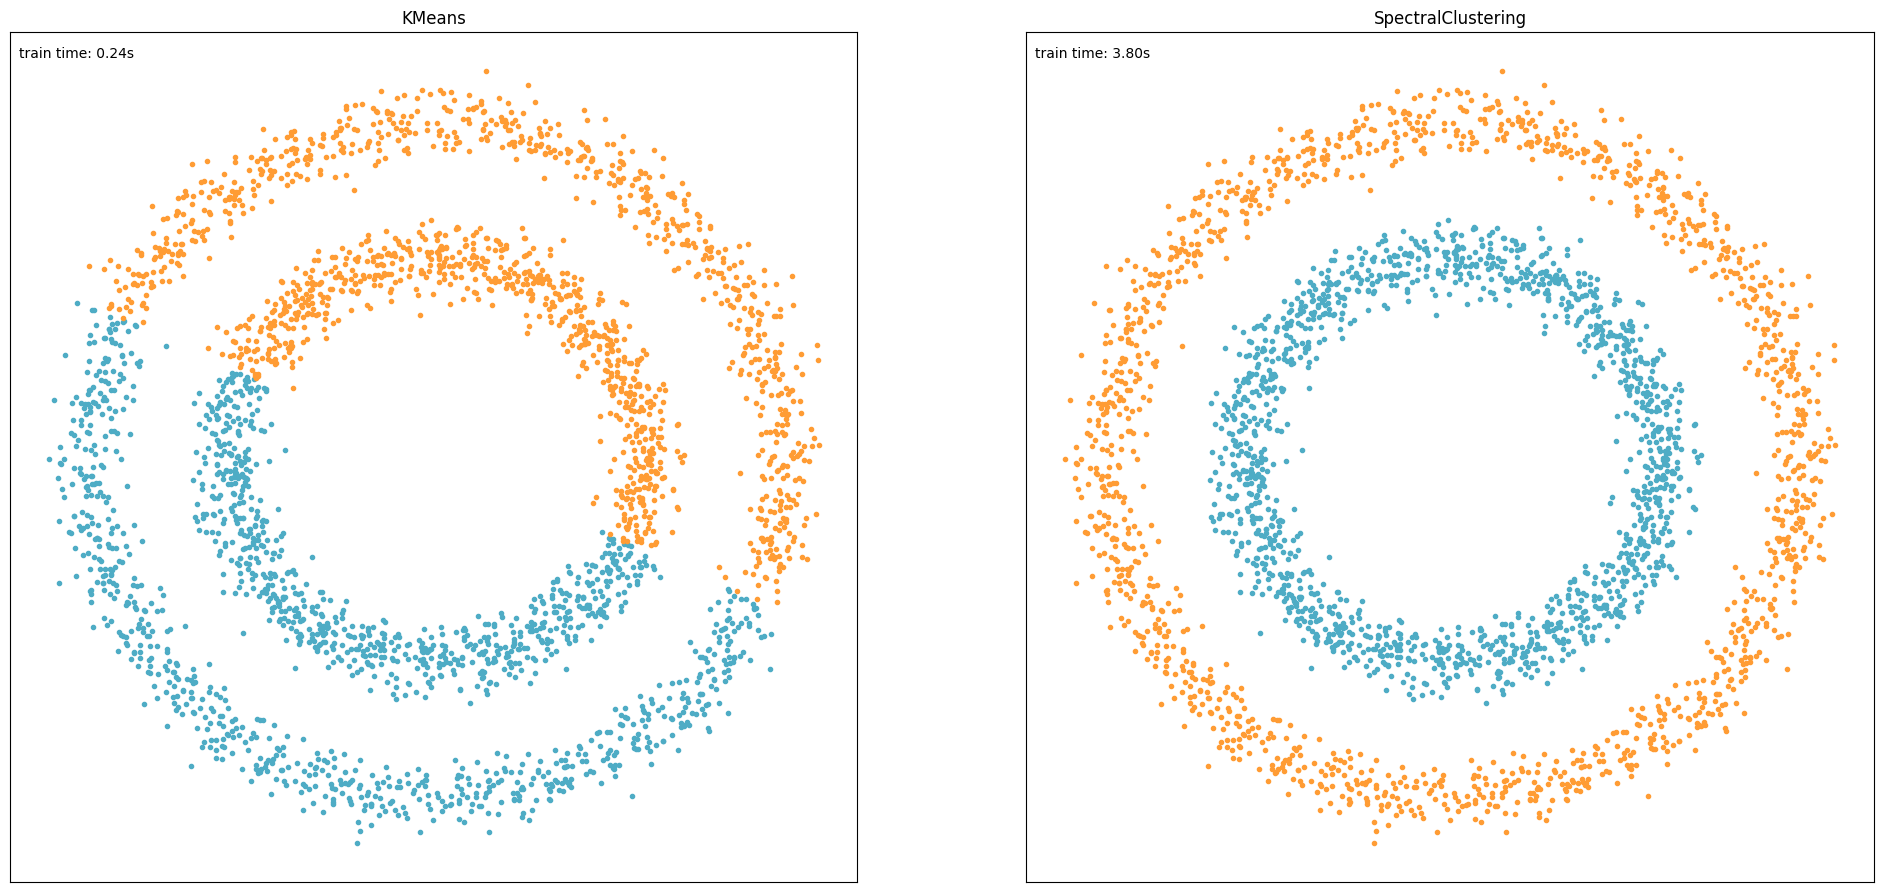

In [7]:
fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(2), colors):
    my_members = k_means_labels == k
    ax.scatter(X[my_members, 0], X[my_members, 1], color=col, marker=".")
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-1.2, 1.2, "train time: %.2fs" % (t_batch))

# SpectralClustering
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(2), colors):
    my_members = sc_labels == k
    ax.scatter(X[my_members, 0], X[my_members, 1], color=col, marker=".")
ax.set_title("SpectralClustering")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-1.2, 1.2, "train time: %.2fs" % (t_mini_batch))

plt.show()